In [1]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('../code')
sys.path.append(PROJECT_DIR)

In [2]:
# Import main classes.
from src.genome.gene import Gene
from src.genome.chromosome import Chromosome
from src.engines.standard_ga import StandardGA

# Import Selection Operators.
from src.operators.selection.tournament_selector import TournamentSelector
from src.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operators.
from src.operators.crossover.uniform_crossover import UniformCrossover
from src.operators.crossover.single_point_crossover import SinglePointCrossover

# Import Mutation Operators.
from src.operators.mutation.swap_mutator import SwapMutator
from src.operators.mutation.random_mutator import RandomMutator

## Rosenbrock optimization (with constraints).

In [3]:
# Rosenbrock function.
def fun_Rosenbrock(_chromosome):
    
    # Penalty coefficient.
    p_c = 0.5
    
    # Extract gene values as 'x' and 'y', for parsimony.
    x, y = _chromosome[0].datum, _chromosome[1].datum
    
    # Compute the function value.
    f_val = (1.0 - x)**2 + 100*(y - x**2)**2
    
    # Return the negative (to account for minimization).
    return -(f_val + p_c*max(0.0, x**2 + y**2 - 2.0)**2)
# _end_def_

# Random function ~U(-1.5, +1.5).
_func = lambda: np.random.uniform(-1.5, +1.5001)

In [4]:
# Define the number of chromosomes.
N = 100

# Initial population.
population = [Chromosome([Gene(np.random.normal(), _func),
                          Gene(np.random.normal(), _func)], np.nan, True)
              for i in range(N)]

# Set the fitness function.
fun_optim = fun_Rosenbrock

# Create the StandardGA.
toy_GA = StandardGA(initial_pop=population, fit_func=fun_optim,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(0.2),
                    cross_op=UniformCrossover())

In [5]:
toy_GA(epochs=3000, elitism=True, f_tol=1.0e-6, verbose=False)

Initial Avg. Fitness = -727.4688
Final Avg. Fitness = -16.5118
Elapsed time: 18.108 seconds.


In [6]:
toy_GA.best_chromosome().fitness, toy_GA.best_chromosome()._genome

(-0.00045979664122426157,
 [Gene(datum=1.0049332483891704, _func=<function <lambda> at 0x11a92b640>, valid=True),
  Gene(datum=1.0097037611703827, _func=<function <lambda> at 0x11a92b640>, valid=True)])

In [7]:
toy_GA.print_operator_stats()

 UniformCrossover: (4740568288)
 _probability: 0.9
 _rng: Generator(PCG64)
 _counter: 150000

 LinearRankSelector: (4739623536)
 _probability: 1.0
 _rng: Generator(PCG64)
 _counter: 3000

 RandomMutator: (4740853856)
 _probability: 0.2
 _rng: Generator(PCG64)
 _counter: 59992



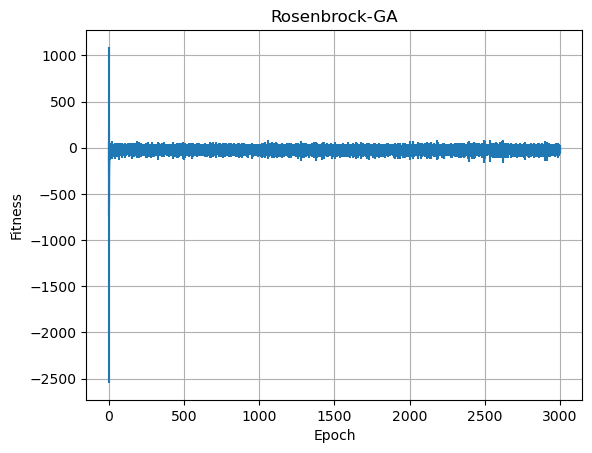

In [8]:
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'])

plt.grid(True)
plt.title("Rosenbrock-GA")
plt.xlabel("Epoch")
plt.ylabel("Fitness");